## Plots

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


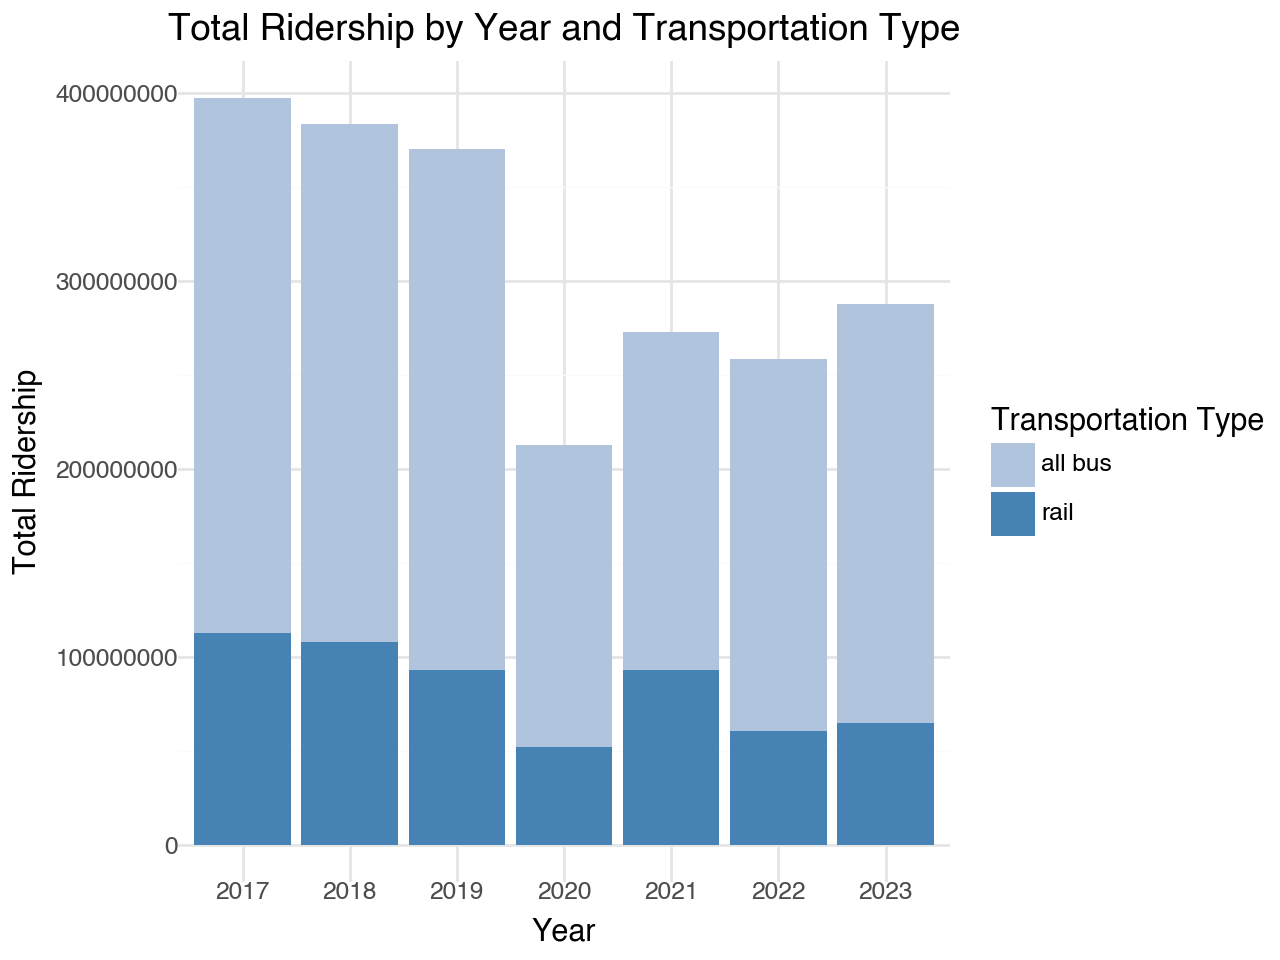

In [16]:
#packages
import pandas as pd
from plotnine import *
from matplotlib.dates import DateFormatter
data = pd.read_csv("/Users/stolieerickson/Documents/MSBA/Fall/GSB544-Computing/Project/gas_data.csv")
#date variable
data['date'] = pd.to_datetime(data[['year', 'month']].assign(day=1))

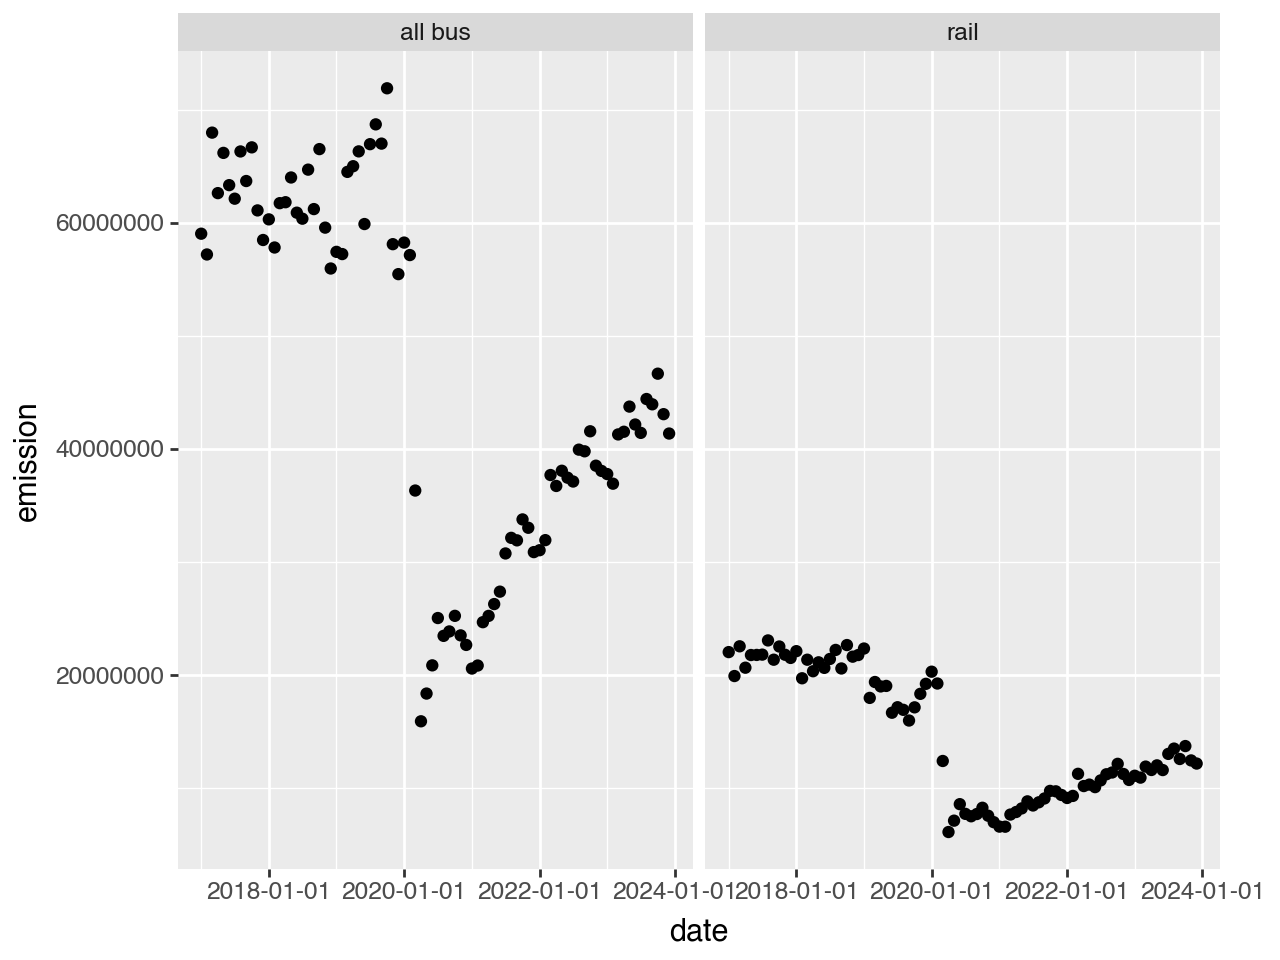

In [6]:

(ggplot(data, aes(x = "date", y = "emission")) +
    geom_point() +
    facet_wrap("transportation_type")
)

<positron-console-cell-14>:13: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


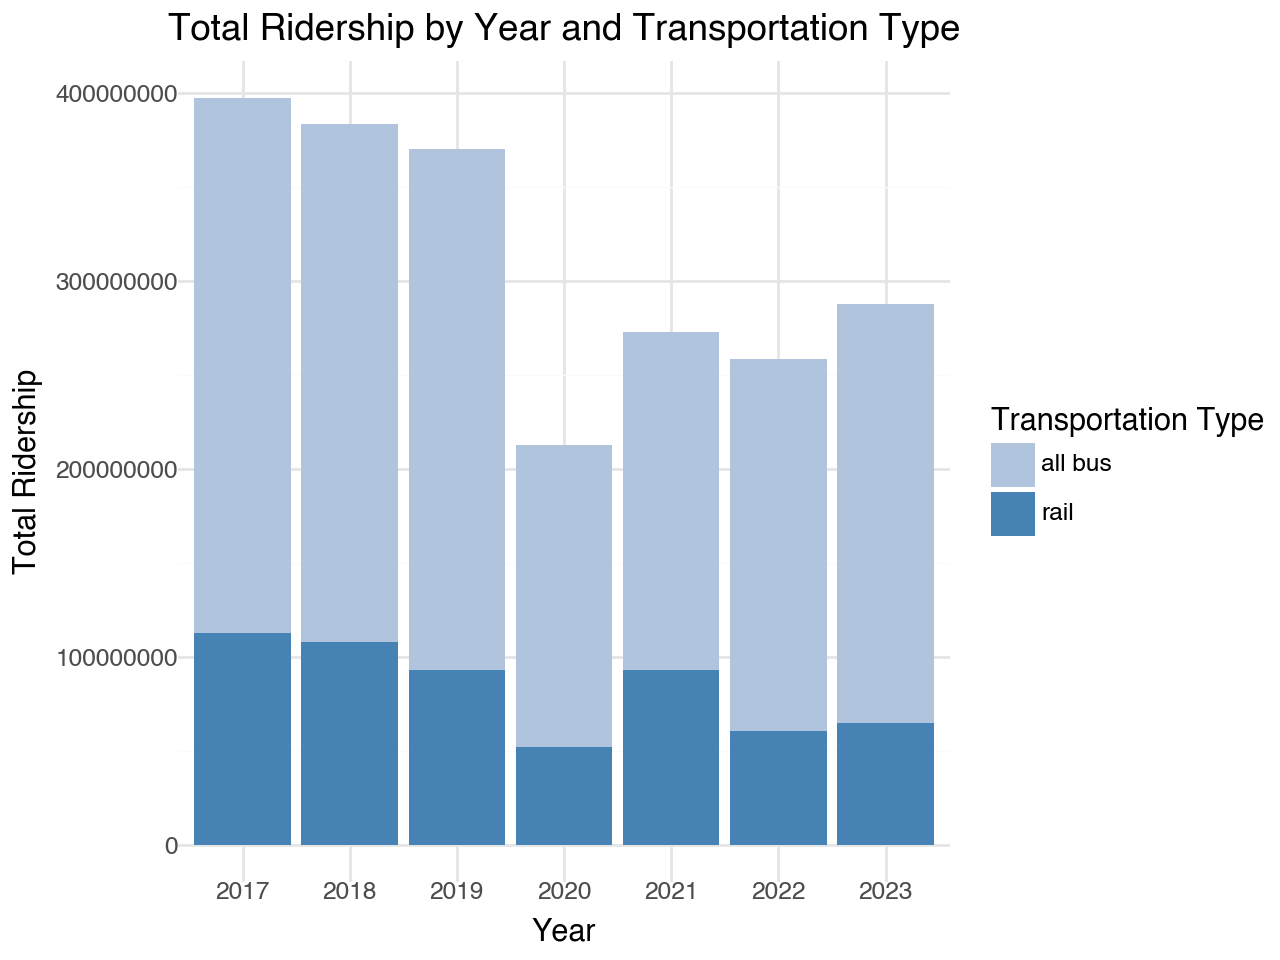

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


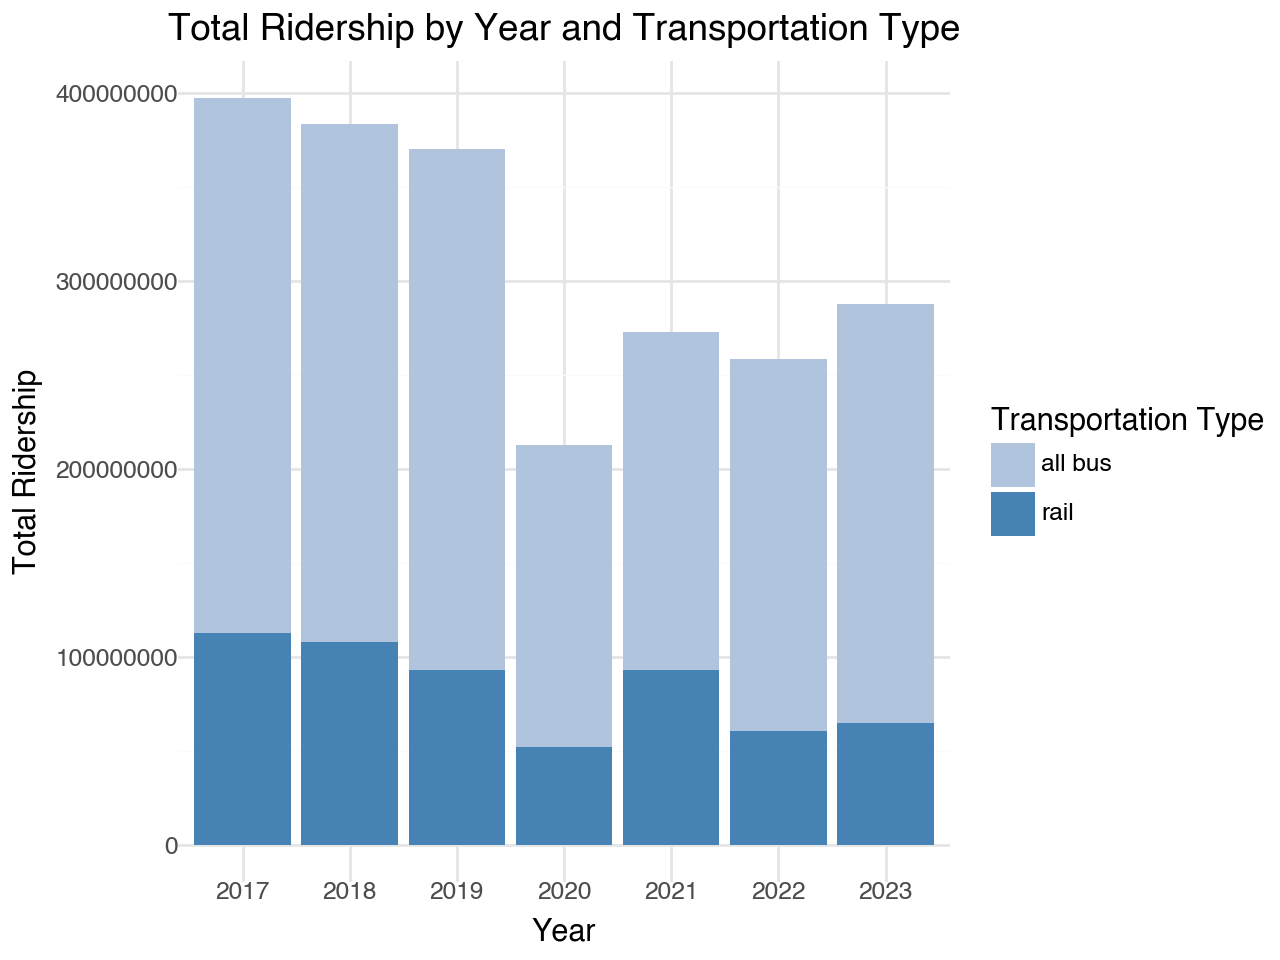

In [14]:
plot = (
    ggplot(data, aes(x='factor(year)', y='total_ridership', fill='transportation_type')) +
    geom_bar(stat='identity') +
    labs(title='Total Ridership by Year and Transportation Type',
         x='Year',
         y='Total Ridership',
         fill='Transportation Type') +
    scale_fill_manual(values=['lightsteelblue', 'steelblue']) + 
    theme_minimal()
)

# Display the plot
print(plot)

<positron-console-cell-19>:17: FutureWarning: Using print(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


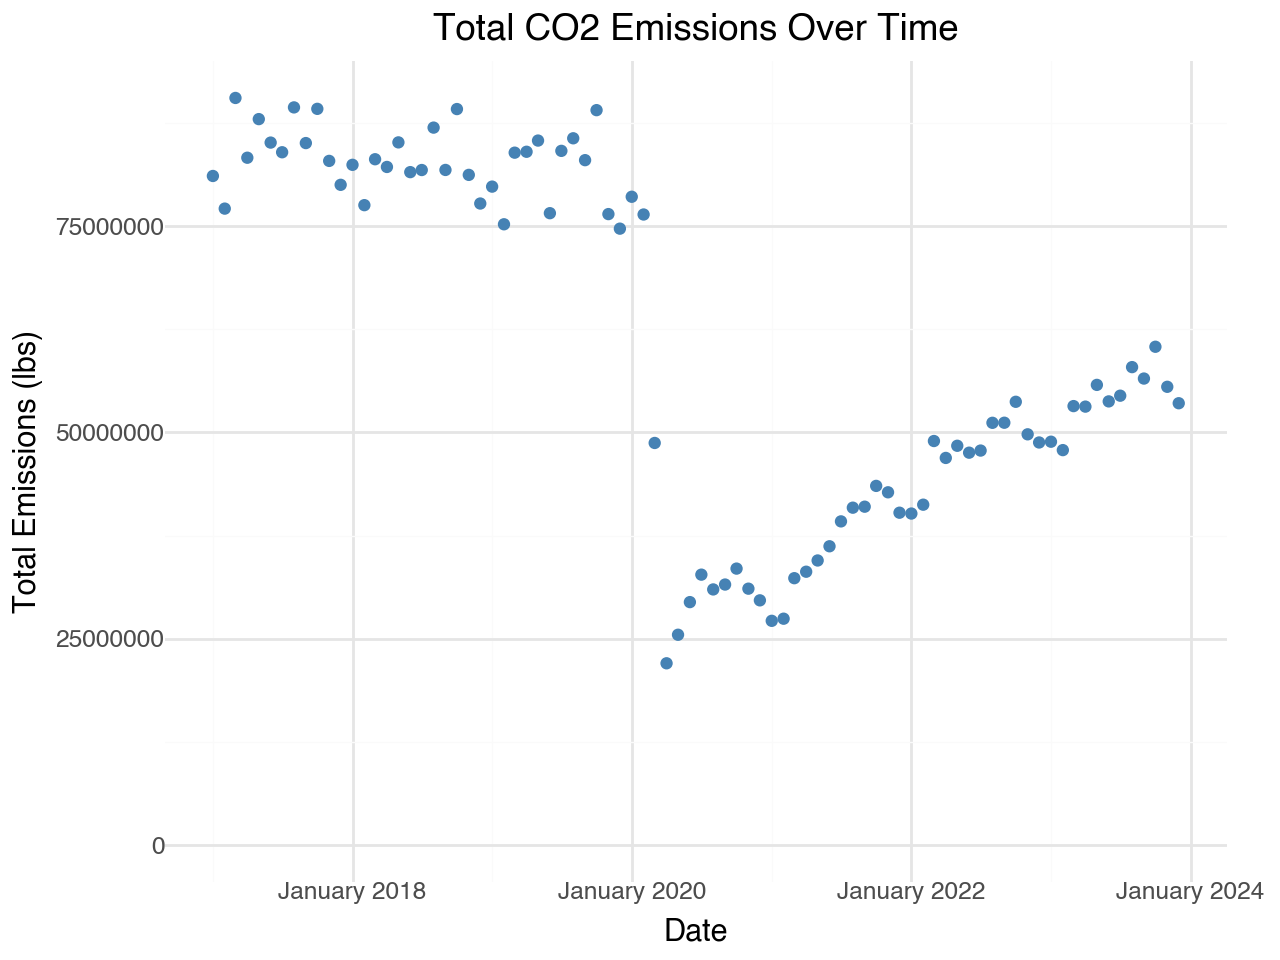

/opt/anaconda3/lib/python3.12/pprint.py:632: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


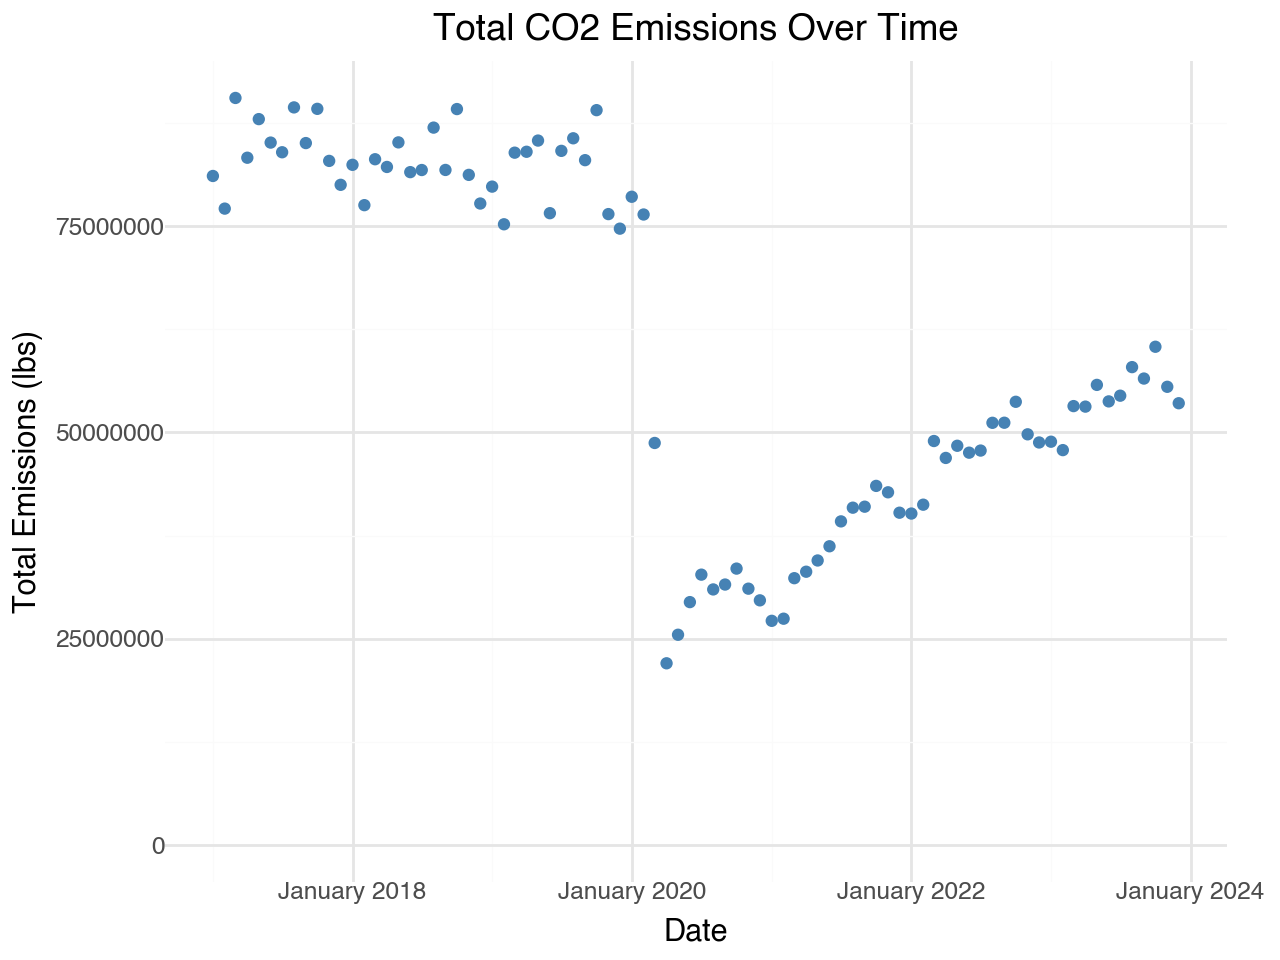

In [19]:

# Aggregate to get total emissions per month
monthly_emissions = data.groupby('date', as_index=False).agg(total_emission=('emission', 'sum'))

# Create the scatter plot with formatted date labels
plot = (
    ggplot(monthly_emissions, aes(x='date', y='total_emission')) +
    geom_point(color="steelblue") +
    labs(title='Total CO2 Emissions Over Time',
         x='Date',
         y='Total Emissions (lbs)') +
    scale_x_date(date_labels='%B %Y') +  # Format dates as "March 2018"
    ylim(0, None) +
    theme_minimal()
)

# Display the plot
print(plot)